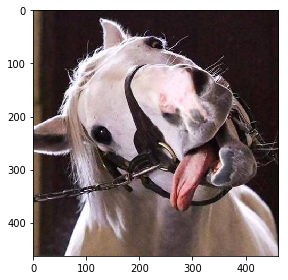

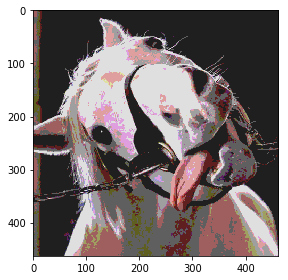

In [2]:
from skimage import io
import matplotlib.pyplot as plt
import math

def posterize(image):
    rows,cols,dims=image.shape 
    for i in range(0,rows):
        for j in range(0,cols):
            for k in range(0,3):
                color = image[i,j,k]
                image[i,j,k] = math.floor(color/64)*64+31

    return image

img=io.imread('goldship.jpg')
io.imshow(img)

img2 = posterize(img) 
plt.figure() 
io.imshow(img2)
io.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


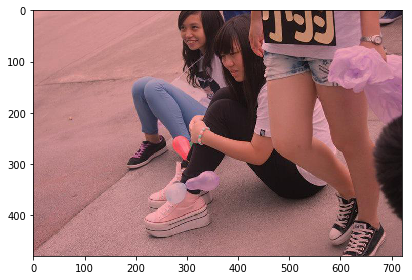

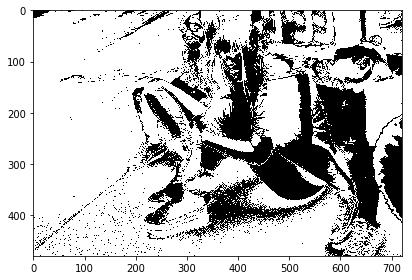

In [6]:
from skimage import io
import matplotlib.pyplot as plt 
import math

def grayPosterize(image): 
    rows,cols,dims=image.shape 
    for i in range(0,rows):
        for j in range(0,cols):
            luminance = (image[i,j,0]+image[i,j,1]+image[i,j,2])/3
#luminance = (int(image[i,j,0])+int(image[i,j,1])+int(image[i,j,2]))/3
            if (luminance<32):
                image[i,j,0] = 0 
                image[i,j,1] = 0 
                image[i,j,2] = 0
            else:
                image[i,j,0] = 255 
                image[i,j,1] = 255 
                image[i,j,2] = 255
    return image

img = io.imread('friend.jpg') 
io.imshow(img)

img2 = grayPosterize(img) 
plt.figure() 
io.imshow(img2)
io.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


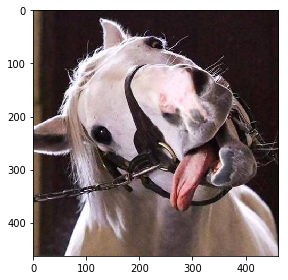

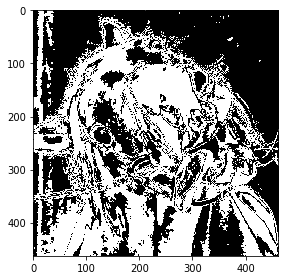

In [7]:
from skimage import io
import matplotlib.pyplot as plt 
import math

def grayPosterize(image): 
    rows,cols,dims=image.shape 
    ret_img = image[:,:,0]
    for i in range(0,rows):
        for j in range(0,cols):
            luminance = (image[i,j,0]+image[i,j,1]+image[i,j,2])/3 
            if (luminance<32):
                ret_img[i,j] = 0
            else:
                ret_img[i,j] = 255
    return ret_img

img=io.imread('goldship.jpg')
io.imshow(img)

img2 = grayPosterize(img)
plt.figure() 
io.imshow(img2)
io.show()

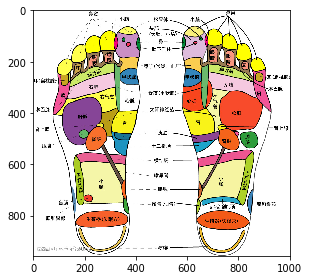

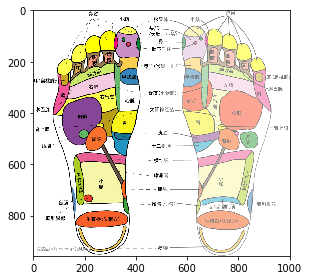

In [10]:
from skimage import io
import matplotlib.pyplot as plt 
import numpy as np

def halfBrighter(image):
    rows,cols,dims=image.shape
    ret_img = np.uint8(np.zeros((rows,cols,3)))
    for i in range(0,rows):
        for j in range(0,cols):
            if j>cols/2:
                for k in range(0,3):
                    ret_img[i,j,k] = np.uint8(image[i,j,k]/2)+128
            else:
                for k in  range(0,3):
                    ret_img[i,j,k] = image[i,j,k]
    return ret_img

img=io.imread('food.jpg')
io.imshow(img)

img2 = halfBrighter(img)
plt.figure() 
io.imshow(img2)
io.show()

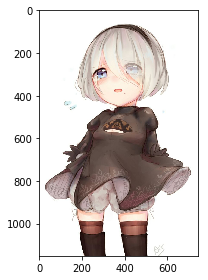

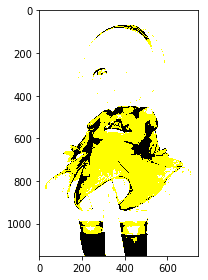

In [13]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

def reduceThree(image):
    rows,cols,dims=image.shape
    ret_img = np.uint8(np.zeros((rows,cols,3)))
    for i in range(0,rows):
        for j in range(0,cols): 
            luminance = 0 #int 
            for k in range(0,3):
                luminance = luminance + image[i,j,k]
            luminance = luminance/3 #float!? 
            if luminance < 64:
                ret_img[i,j,0] = 0 
                ret_img[i,j,1] = 0
                ret_img[i,j,2] = 0
            elif luminance > 120: 
                ret_img[i,j,0] = 255
                ret_img[i,j,1] = 255
                ret_img[i,j,2] = 255
            else:
                ret_img[i,j,0] = 255 
                ret_img[i,j,1] = 255 
                ret_img[i,j,2] = 0
    return ret_img

img=io.imread('2B.jpg')
io.imshow(img)

img2 = reduceThree(img)
plt.figure() 
io.imshow(img2)
io.show()

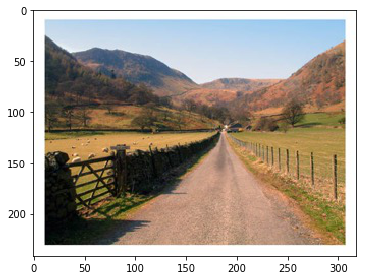

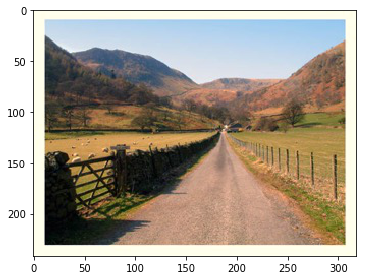

In [14]:
from skimage import io
import matplotlib.pyplot as plt
import math

def sepiaToned(image): 
    rows,cols,dims=image.shape 
    for i in range(0,rows):
        for j in range(0,cols): 
            red = image[i,j,0] 
            blue = image[i,j,2]

#tint shadows 
            if(red<63):
                red=red*1.1 
                blue=blue*0.9
            #tint midtones
            if (red > 62 and red < 192):
                red = red*1.15 
                blue = blue*0.85

#tint highlights
            if (red > 191):
                red = red*1.08
            if (red > 255):
                red = 255

                blue = blue*0.93

                image[i,j,0] = red 
                image[i,j,2] = blue

    return image

img=io.imread('road.jpg') 
io.imshow(img)

img2 = sepiaToned(img) 
plt.figure() 
io.imshow(img2)
io.show()

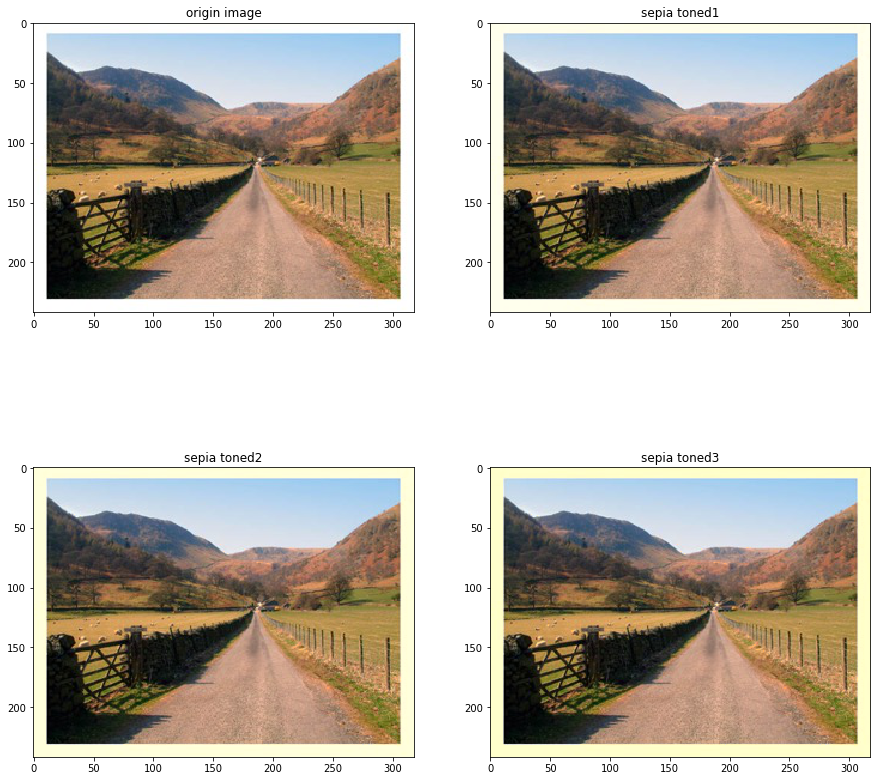

In [15]:
from skimage import io
import matplotlib.pyplot as plt

def sepiaToned(image): 
    rows,cols,dims=image.shape 
    for i in range(0,rows):
        for j in range(0,cols): 
            red = image[i,j,0]
            blue = image[i,j,2]

#tint shadows 
            if(red<63):
                red=red*1.1
                blue=blue*0.9

#tint midtones
            if (red > 62 and red < 192):
                red = red*1.15
                blue = blue*0.85

#tint highlights 
            if (red > 191):
                red = red*1.08
            if (red > 255):
                red = 255

                blue = blue*0.93

                image[i,j,0] = red 
                image[i,j,2] = blue

    return image

img=io.imread('road.jpg')
plt.figure(num='road',figsize=(15,15))

plt.subplot(2,2,1) 
plt.title('origin image')
plt.imshow(img)

img2 = sepiaToned(img.copy())
plt.subplot(2,2,2)
plt.title('sepia toned1')
plt.imshow(img2)

img3 = sepiaToned(img2.copy())
plt.subplot(2,2,3)
plt.title('sepia toned2')
plt.imshow(img3)

img4 = sepiaToned(img3.copy())
plt.subplot(2,2,4)
plt.title('sepia toned3')
plt.imshow(img4)

plt.show()

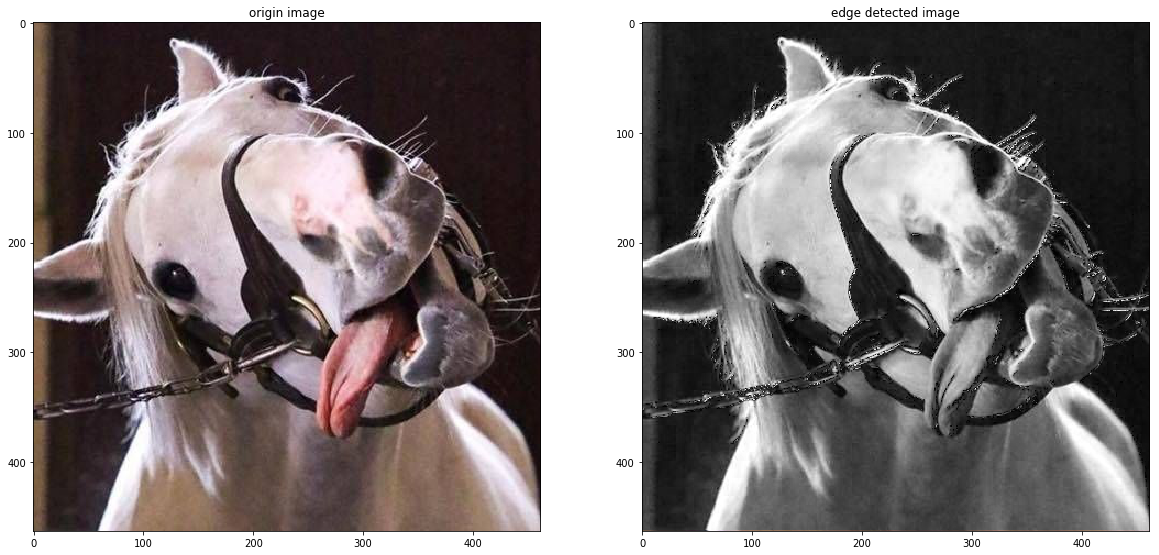

In [20]:
from skimage import io
import matplotlib.pyplot as plt

def edgeDetection(image):
    rows,cols,dims=image.shape 
    for i in range(0,rows-1):
        for j in range(0,cols-1): 
            sum = 0
            sum_rightBottom = 0
            for k in range(0,3):
                sum = sum + image[i,j,k]
                sum_rightBottom = sum_rightBottom + image[i+1,j+1,k]
                dif = abs(sum_rightBottom - sum)

                for k in range(0,3):
                    image[i,j,k] = dif
    return image 
img=io.imread('goldship.jpg')
plt.figure(num='scene', figsize=(20,20)) 
plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(img)

img2 = edgeDetection(img)
plt.subplot(1,2,2)
plt.title('edge detected image')
plt.imshow(img2)
plt.show()

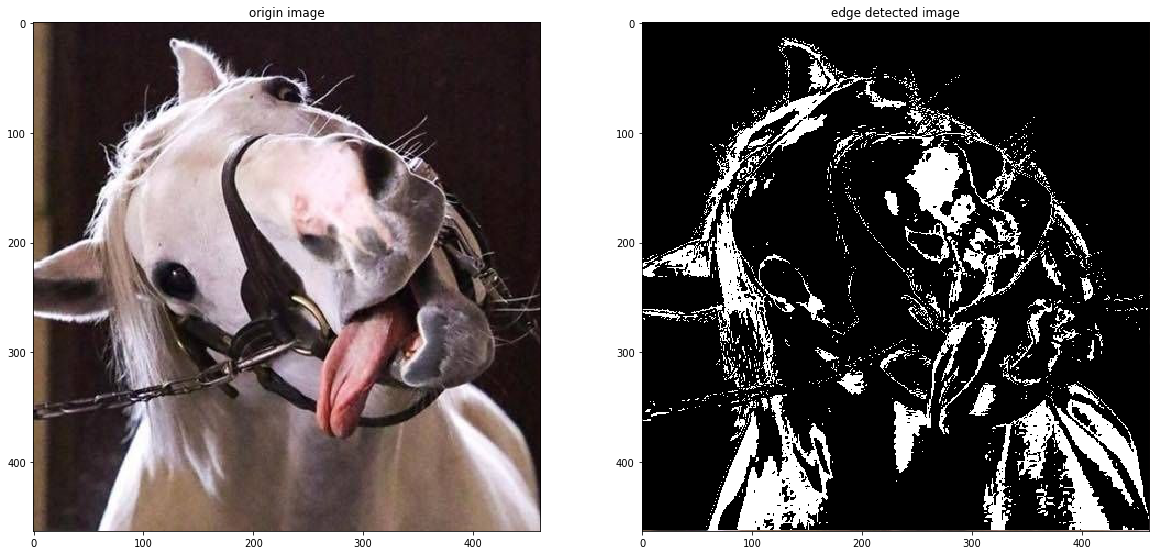

In [22]:
from skimage import io
import matplotlib.pyplot as plt

def edgeDetection(image,thre): 
    rows,cols,dims=image.shape 
    for i in range(0,rows-1):
        for j in range(0,cols-1): 
            sum = 0 
            sum_rightBottom = 0 
            for k in range(0,3):
                sum = sum + image[i,j,k]
                sum_rightBottom = sum_rightBottom + image[i+1,j+1,k]
                dif = abs(sum_rightBottom - sum)
                if dif > thre:
                    value = 0
                else:
                    value = 255
                for k in range(0,3):
                    image[i,j,k] = value
    return image

img=io.imread('goldship.jpg') 
threshold = 50

plt.figure(num='scene', figsize=(20,20))

plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(img)

img2 = edgeDetection(img, threshold)

plt.subplot(1,2,2)
plt.title('edge detected image')
plt.imshow(img2)
plt.show()